# Studies of Interference in Serial Verbal Reactions (Stroop, 1935)

In [2]:
import glob
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
import numpy as np

path = '/Users/ethan/Documents/GitHub/Learn-PsychoPy/Labs/Stroop/experiments/stroop/data/'
all_files = glob.glob(path + "/*.csv")

# assemble data from all participants into one dataframe

temp = [] # make a list to hold all the individual dataframes

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0) # read in each dataframe
    df = df[df['resp.rt'].notna()] # remove trials with no participant response
    temp.append(df) # add each dataframe to the list of dataframes

df = pd.concat(temp, axis=0, ignore_index=True) # concatenate all participants' data

In [3]:
# inspect concatenated data
df

,text,letterColor,corrAns,congruent,practice.thisRepN,practice.thisTrialN,practice.thisN,practice.thisIndex,trials.thisRepN,trials.thisTrialN,...,instrText.stopped,thanksText.started,thanksText.stopped,participant,session,date,expName,psychopyVersion,frameRate,Unnamed: 33
0,green,blue,right,incong,0.0,0.0,0.0,7.0,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,2020_Apr_04_1338,stroop,2020.1.2,59.741897,NaN
1,blue,blue,right,cong,0.0,1.0,1.0,10.0,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,2020_Apr_04_1338,stroop,2020.1.2,59.741897,NaN
2,green,green,down,cong,0.0,2.0,2.0,5.0,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,2020_Apr_04_1338,stroop,2020.1.2,59.741897,NaN
3,red,green,down,incong,0.0,3.0,3.0,2.0,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,2020_Apr_04_1338,stroop,2020.1.2,59.741897,NaN
4,green,green,down,cong,0.0,4.0,4.0,6.0,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,2020_Apr_04_1338,stroop,2020.1.2,59.741897,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,blue,green,down,incong,NaN,NaN,NaN,NaN,4.0,7.0,...,NaN,NaN,NaN,2.0,1.0,2020_Apr_04_1340,stroop,2020.1.2,59.519953,NaN
140,red,green,down,incong,NaN,NaN,NaN,NaN,4.0,8.0,...,NaN,NaN,NaN,2.0,1.0,2020_Apr_04_1340,stroop,2020.1.2,59.519953,NaN
141,blue,blue,right,cong,NaN,NaN,NaN,NaN,4.0,9.0,...,NaN,NaN,NaN,2.0,1.0,2020_Apr_04_1340,stroop,2020.1.2,59.519953,NaN
142,red,red,left,cong,NaN,NaN,NaN,NaN,4.0,10.0,...,NaN,NaN,NaN,2.0,1.0,2020_Apr_04_1340,stroop,2020.1.2,59.519953,NaN


In [14]:
# get the mean RT values for each particpant grouped by condition
data = df['resp.rt'].groupby([df['participant'], df['congruent']]).mean()
df = data.reset_index(level=['participant', 'congruent']) # re-assign indices to column names

In [15]:
# inspect the aggregated data
df

,participant,congruent,resp.rt
0,1.0,cong,0.817494
1,1.0,incong,0.881451
2,2.0,cong,0.685641
3,2.0,incong,0.969093


In [18]:
incongruent = df.loc[(df.congruent == 'incong')]
congruent = df.loc[(df.congruent == 'cong')]

incong = incongruent['resp.rt'].to_numpy()
cong = congruent['resp.rt'].to_numpy()

In [21]:
from scipy import stats
res = stats.ttest_rel(cong, incong)
#res
print("t-statistic: ", res[0])
print("p-values: ", res[1])

t-statistic:  -1.5827755653993056
p-values:  0.358719547937977


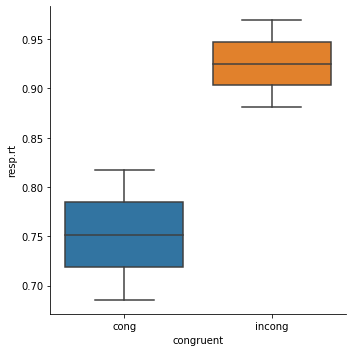

In [22]:
boxplot = sns.catplot(x="congruent", y="resp.rt", kind="box", data=df)